# 20 - Logistic Regression

## Introduction to Logistic Regression
**Logistic regression** is a fundamental statistical technique used for <u>binary classification problems</u>. While its name contains "regression," it's important to note that logistic regression is primarily used for **classification**, not regression tasks.

### Comparison to Linear Regression
**Linear regression**, another widely-used statistical technique, predicts <u>continuous values</u> based on input features by fitting a linear equation to the observed data. 

In contrast, **logistic regression** predicts the <u>probability</u> that an instance belongs to a particular class.

### Applications:
- **Medical Diagnosis:** Logistic regression is used in healthcare for tasks such as predicting whether a patient has a particular disease based on symptoms or risk factors. For example, it can be used to predict the likelihood of a patient having cancer based on medical test results.

- **Credit Scoring:** In finance, logistic regression is employed for credit scoring to assess the likelihood of a borrower defaulting on a loan. By analyzing features such as credit history, income, and debt-to-income ratio, logistic regression models can help financial institutions make informed lending decisions.

- **Natural Language Processing (NLP):** In NLP, logistic regression is used for tasks such as sentiment analysis, spam detection, and text classification. By analyzing textual features, logistic regression models can classify documents or messages into predefined categories.

## Theoretical Example
Let's look at this problem in 1-Dimension. Let's consider a synthetic dataset where we aim to detect breast cancer. More specifically, we want to classify breast mass samples as either benign or malignant ($y$) based on a single feature: the mean radius of cell nuclei ($x_1$)

Below we generate synthetic data for two classes:
- **Class 0 (negative)**: Benign samples

- **Class 1 (positive)**: Malignant samples

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for breast cancer detection
N = 100  # Number of samples
mean_negative = 4
std_negative = 2 
mean_positive = 9
std_positive = 2 

# Generate negative (class 0) samples
negative_samples = np.random.normal(mean_negative, std_negative, N//2)
negative_labels = np.zeros(N//2)

# Generate positive (class 1) samples
positive_samples = np.random.normal(mean_positive, std_positive, N//2)
positive_labels = np.ones(N//2)

# Combine samples and labels
x1 = np.concatenate([negative_samples, positive_samples])
y = np.concatenate([negative_labels, positive_labels])

# Shuffle the data
shuffle_indices = np.arange(N)
np.random.shuffle(shuffle_indices)
x1 = x1[shuffle_indices]
y = y[shuffle_indices]

# Create a DataFrame to store the data
df = pd.DataFrame({'x1': x1, 'y': y})
df.head(10)

,x1,y
0,2.796587,0.0
1,7.321565,1.0
2,0.173440,0.0
3,4.342737,0.0
4,5.534869,0.0
5,6.931298,0.0
6,6.072970,1.0
7,7.046060,0.0
8,4.687237,0.0
9,0.550164,0.0


**Note**: $x_1 = \text{mean radius of cell nuclei, } y = \text{breast cancer classification label}$

We can visualize the synthetic data using a scatter plot, where **<font color="blue">blue points</font>** represent benign samples and **<font color="red">red points</font>** represent malignant samples.

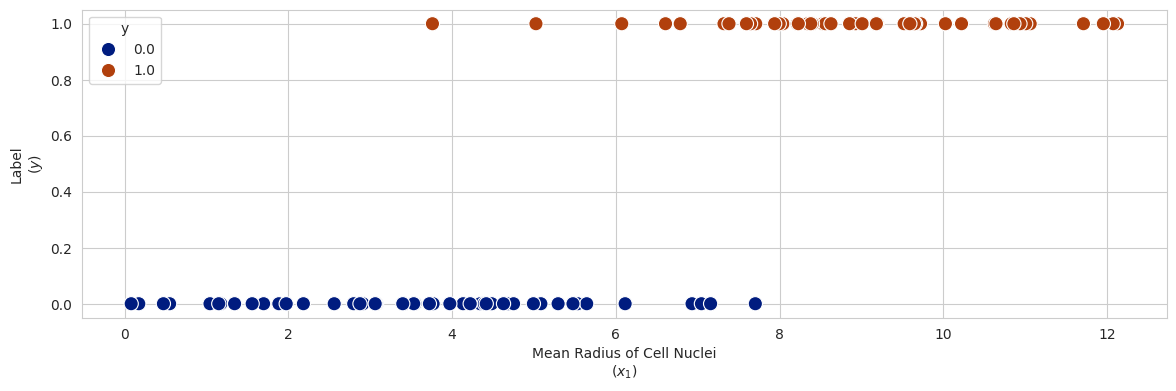

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(14,4))
sns.scatterplot(x=df['x1'], y=df['y'], s=105, palette='dark', hue=df['y'])
plt.xlabel('Mean Radius of Cell Nuclei\n($x_1$)')
plt.ylabel('Label\n($y$)')
plt.show()

From this we can make a few observations:
- There are more <span style="color:red">●</span> on the right, and more <span style="color:blue">●</span> on the left

- Larger values of $x_1$ correspond to larger cell nuclei, which might indicate the presence of cancerous cells

- Conversely, smaller values of $x_1$ might correspond to smaller, healthier cell nuclei

Below, we see there is a threshold somewhere (where $x_1 = 5$?) and the probability of going from class 0 to 1 increases, finally to around 100% by $x_1=8$

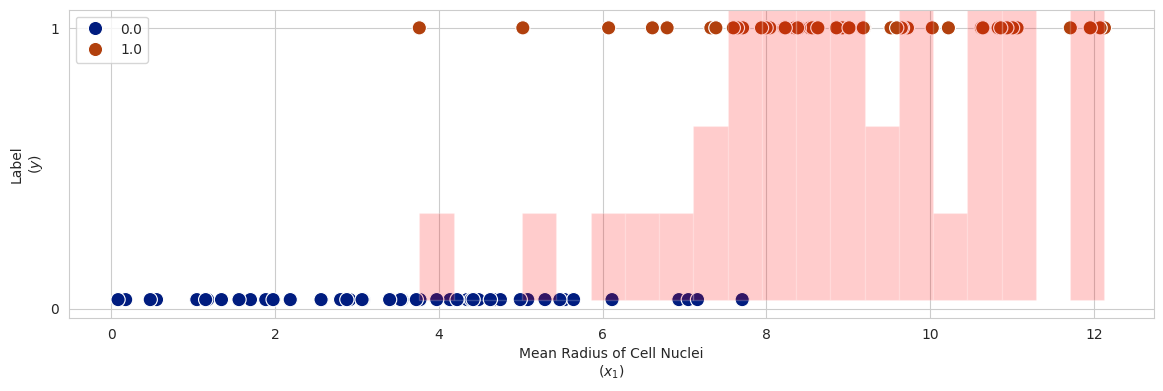

In [3]:
plt.figure(figsize=(14,4))
pos = x1[y==1]
neg = x1[y==0]
ax = sns.scatterplot(x=x1, y=0.15*y, s=105, palette='dark', hue=y)
plt.hist(pos, color='r', bins=20, alpha=0.2, density=True)
# plt.hist(neg, color='b', bins=20, alpha=0.2, density=True)

plt.xlabel('Mean Radius of Cell Nuclei\n($x_1$)')
plt.ylabel('Label\n($y$)')
plt.yticks([-.005,0.15], ['0','1'])
plt.ylim(-0.01,0.16)
plt.show()

To visualize the decision boundary, we can plot a line (or curve) that separates the two classes based on their feature values. 

The decision boundary is determined by the parameters ($w_0$ and $w_1$) learned by the logistic regression model during training.

In [4]:
from ipywidgets import Checkbox, interactive

# Define the sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))


# Define the repaint function
def repaint_decision_boundary(w0, w1, plot_sigmoid, plot_decision_boundary):
    x1sort = np.sort(x1)
    plt.figure(figsize=(14,4))
    ax = sns.scatterplot(x=x1, y=y, s=105, palette='dark', hue=y)

    if plot_sigmoid:
        z = w0 + w1*x1sort 
        plt.plot(x1sort,sigmoid(z))

    if plot_decision_boundary:
        # Plot decision boundary at y=0.5
        plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5)

        # Find the x-coordinate where sigmoid meets the decision boundary
        decision_boundary_x = x1sort[np.argmin(np.abs(sigmoid(z) - 0.5))]
        
        # Plot vertical line from sigmoid to decision boundary
        plt.plot([decision_boundary_x, decision_boundary_x], [0, 0.5], color='black', linestyle='--', linewidth=1.5)

    plt.xlabel('Mean Radius of Cell Nuclei\n($x_1$)')
    plt.ylabel('Probability of Class 1')

# Create checkbox widget for enabling/disabling sigmoid function plot
sigmoid_checkbox = Checkbox(value=False, description='Plot Sigmoid')

# Create checkbox widget for enabling/disabling decision boundary
decision_boundary_checkbox = Checkbox(value=False, description='Plot Decision Boundary')

# Create interactive plot
def update_plot(w0=-2.5, w1=0.8, plot_sigmoid=False, plot_decision_boundary=False):
    repaint_decision_boundary(w0, w1, plot_sigmoid, plot_decision_boundary)
    
interactive_plot = interactive(update_plot, w0=(-16.0,5.0), w1=(-0.5,2.0), plot_sigmoid=sigmoid_checkbox, plot_decision_boundary=decision_boundary_checkbox)
interactive_plot

interactive(children=(FloatSlider(value=-2.5, description='w0', max=5.0, min=-16.0), FloatSlider(value=0.8, de…

The logistic regression model calculates the probability of each sample belonging to class 1 based on its feature values. The decision boundary (or threshold) is where this probability equals 0.5.

We can explore the concept of the decision boundary further by examining how it changes with different threshold values and model parameters.

## Mathematical Background
Understanding the mathematical foundations of logistic regression is essential for grasping how the algorithm works. In this section, we'll delve into the key mathematical concepts behind logistic regression, including the **logistic function**, the **hypothesis function**, and the **cost function**.

### Logistic Function
The **logistic function**, also known as the **sigmoid function**, is a fundamental component of logistic regression. It maps any real-valued number to the range $[0, 1]$, making it suitable for modeling binary classification problems.

The logistic function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

where $z$ is a linear combination of the input features and model parameters:

$$z = w_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{j}x_{j}$$

Here, $w_0, w_1, w_2, ..., w_j$ are the parameters (or weights) learned by the logistic regression model, and $x_1, x_2, ..., x_j$ are the input features.

So we have,

$$g(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(w_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{j}x_{j})}}$$

The logistic function $g(z)$ transforms the linear combination $z$ into into a probability value between 0 and 1. This probability represents the likelihood that a given sample belongs to the positive class (class 1).

## Hypothesis Function
In logistic regression, the **hypothesis function** $h_{\bf w}({\bf x})$ predicts the probability that a given input sample ${\bf x}$ belongs to the positive class (class 1). It is defined as the logistic function applied to the linear combination of input features and model parameters:

$$h_{\bf w}({\bf x}) = g({\bf w}^{T}{\bf x}) = \frac{1}{1+e^{-{\bf w}^{T}{\bf x}}}$$

Where:

- ${\bf w}$ is the vector of model parameters (weights).

- ${\bf x}$ is the vector of input features.

- ${\bf w}^{T}$ represents the transpose of the weight vector.

- ${\bf w}^{T}{\bf x}$ is the dot product of the weight vector and the input feature vector.

## Cost Function
The **cost function**, also known as the **logistic loss function** or **binary cross-entropy loss function**, measures the difference between the predicted probabilities and the actual class labels. The goal of logistic regression is to minimize the cost function, thereby improving the model's predictive accuracy.

The logistic regression cost function for a single sample is defined as:

$$J({\bf w}) = - (y\log(h_{\bf w}({\bf x})) + (1 - y) \log(1 - h_{\bf w}({\bf x})))$$

Where:
- $J({\bf w})$ is the cost associated with the current model parameters ${\bf w}$.
- $h_{\bf w}({\bf x})$ is the predicted probability that sample ${\bf x}$ belongs to the positive class.
- $y$ is the actual class label (0 or 1) of sample ${\bf x}$.

The overall cost function $J({\bf w})$ for the entire dataset is the average of the individual costs over all training samples.

Similar to linear regression, logistic regression uses gradient descent to optimize its parameters to minimize the cost function and improve the model's performance. The update rule for gradient descent is given by:


$$w_j = w_j - \alpha\frac{\partial J({\bf w})}{\partial w_j}$$

Where:

- $w_j$ is the j-th parameter (weight) of the model.

- $\alpha$ is the learning rate, which determines the size of the steps taken during optimization.

- $J({\bf w})$ is the cost function.

- $\frac{\partial J(\bf{w})}{\partial w_j}$ is the partial derivative of the cost function with respect to the j-th parameter.

By updating the parameters in the direction of the negative gradient, gradient descent moves towards the minimum of the cost function.

## With `scikit-learn`
Fortunately, Python, R, and many other programming environments have functions for finding the parameters $\bold{w}$ that minimize the cost function.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train.reshape(-1, 1), y_train)

LogisticRegression()

### Interpreting the Final Model Parameters
Having trained our Logistic Regression model using `scikit-learn`, we've successfully optimized its parameters to best fit the data. Let's examine the final model parameters:

In [6]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_.flatten()}")

Intercept: [-11.63004635]
Coefficients: [1.75148832]


With these values, we can write the equation of our logistic (sigmoid) function,

$$g(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(w_{0}~+~w_{1}x_{1})}} = \frac{1}{1+e^{-(-11.63~+~1.75x_{1})}}$$

Let's plot our final logistic regression model,

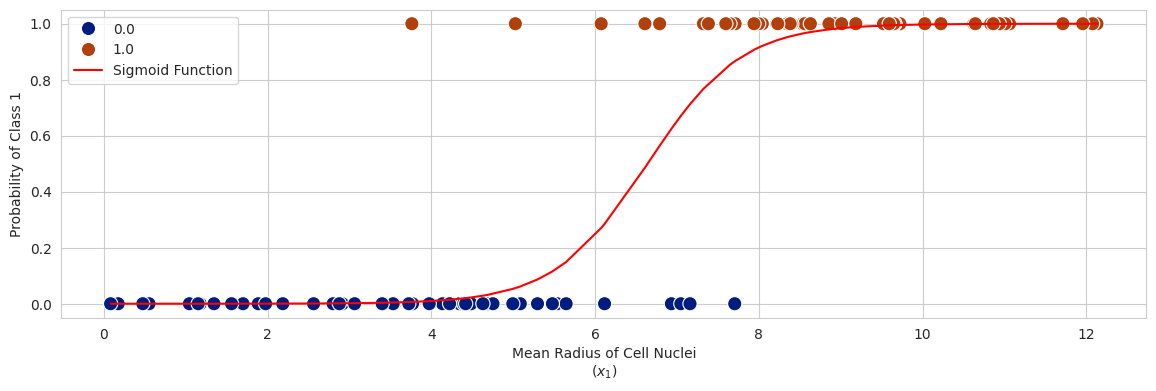

In [7]:
# Get the predicted probabilities for class 1
X_train_sort = np.sort(X_train)
predicted_probabilities = model.predict_proba(X_train_sort.reshape(-1, 1))[:, 1]

plt.figure(figsize=(14, 4))
sns.scatterplot(x=x1, y=y, s=105, palette='dark', hue=y)
plt.plot(X_train_sort, predicted_probabilities, color='red', label='Sigmoid Function')
plt.xlabel('Mean Radius of Cell Nuclei\n($x_1$)')
plt.ylabel('Probability of Class 1')
plt.legend()
plt.show()

### Model Performance Metrics
#### Confusion Matrix:
The confusion matrix provides a tabular summary of the actual vs. predicted classifications. It consists of four main components:
- **True Positives (TP)**: Cases where the model correctly predicts the positive class.

- **True Negatives (TN)**: Cases where the model correctly predicts the negative class.

- **False Positives (FP)**: Cases where the model incorrectly predicts the positive class (Type I error).

- **False Negatives (FN)**: Cases where the model incorrectly predicts the negative class (Type II error).

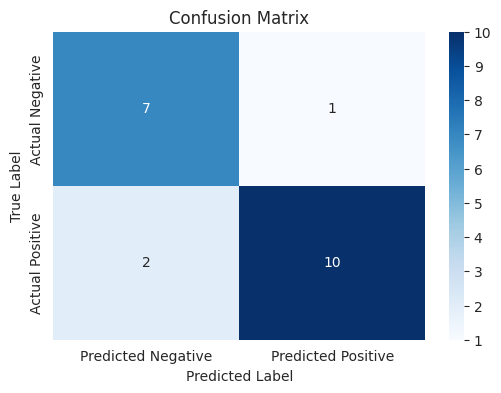

In [8]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_hat = model.predict(X_test.reshape(-1, 1))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)

# Plot confusion matrix with labels
plt.figure(figsize=(6, 4)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Accuracy:
Accuracy measures the proportion of correctly classified instances out of the total instances.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

In [9]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_hat)
print("Accuracy:", accuracy)

Accuracy: 0.85


#### Precision:
Precision quantifies the number of true positive predictions divided by the total number of positive predictions. It measures the model's ability to correctly identify positive instances.

$$\text{Precision} = \frac{TP}{TP + FP}$$

In [10]:
from sklearn.metrics import precision_score

# Calculate precision
precision = precision_score(y_test, y_hat)
print("Precision:", precision)

Precision: 0.9090909090909091


#### Recall (Sensitivity):
Recall calculates the proportion of actual positive cases that were correctly identified by the model. It measures the model's ability to capture all positive instances.

$$\text{Recall} = \frac{TP}{TP + FN}$$

In [11]:
from sklearn.metrics import recall_score

# Calculate recall
recall = recall_score(y_test, y_hat)
print("Recall:", recall)

Recall: 0.8333333333333334


#### F1 Score:
The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

$$\text{F1 Score} = 2 \times \frac{\text{Precision}\times\text{Recall}}{\text{Precision}+\text{Recall}}$$

In [12]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_test, y_hat)
print("F1 Score:", f1)

F1 Score: 0.8695652173913043


#### ROC Curve and AUC:
Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate at various threshold settings. The Area Under the Curve (AUC) summarizes the performance of the model across all classification thresholds.

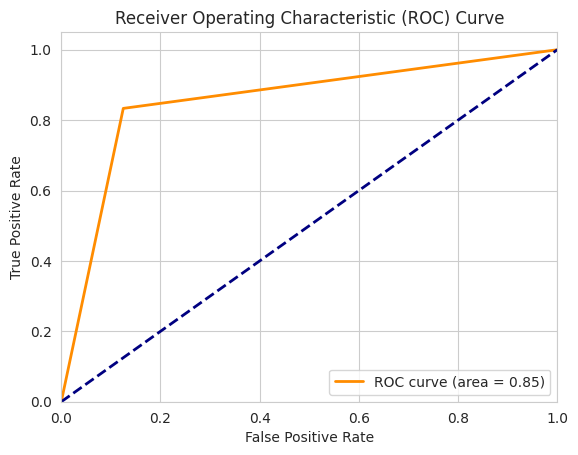

In [13]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Making Predictions
We can use our logistic regression model to make predictions. Lets say we have a patient with a mean radius of cell nuclei ($x_1$) of 6.2. What would our model predict to be the probability they have breast cancer?

In [14]:
new_x1 = np.array([6.2])

predicted_probability = model.predict_proba(new_x1.reshape(1, -1))[:, 1]

print(f"Our model predicts that the patient with a mean radius of cell nuclei {new_x1[0]} has a {round(predicted_probability[0]*100, 2)}% chance of having breast cancer.")

Our model predicts that the patient with a mean radius of cell nuclei 6.2 has a 31.63% chance of having breast cancer.


We can plot our predicted probability to see where it lies on the logistic function.

In [15]:
def plot_predition(plot_decision_boundary=False):
    # Plot the scatterplot with sigmoid function
    plt.figure(figsize=(14, 4))
    sns.scatterplot(x=x1, y=y, s=105, palette='dark', hue=y)
    plt.plot(X_train_sort, predicted_probabilities, color='red', label='Sigmoid Function')

    # Plot the predicted probability for the new data point
    plt.scatter(new_x1, predicted_probability, color='green', marker='*', s=200, label='Prediction', zorder=5)

    if plot_decision_boundary:
        # Plot decision boundary at y=0.5
        plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5)

    plt.xlabel('Mean Radius of Cell Nuclei\n($x_1$)')
    plt.ylabel('Probability of Class 1')
    plt.legend()

    plt.show()

# Create checkbox widget for enabling/disabling decision boundary
other_decision_boundary_checkbox = Checkbox(value=False, description='Plot Decision Boundary')

other_interactive_plot = interactive(plot_predition, plot_decision_boundary=other_decision_boundary_checkbox)
other_interactive_plot

interactive(children=(Checkbox(value=False, description='Plot Decision Boundary'), Output()), _dom_classes=('w…

Because the predicted probability is below the threshold 0.5, the model predicts the class to be 0 (non-cancerous).

In [16]:
# Get the predicted class label (0 or 1)
predicted_class = model.predict(new_x1.reshape(1, -1))

# Output the prediction
if predicted_class[0] == 1:
    print(f"Our model predicts that the patient with a mean radius of cell nuclei {new_x1[0]} has a {round(predicted_probability[0] * 100, 2)}% chance of having breast cancer.\nThe predicted class is 1 (cancerous).")
else:
    print(f"Our model predicts that the patient with a mean radius of cell nuclei {new_x1[0]} has a {round(predicted_probability[0] * 100, 2)}% chance of having breast cancer.\nThe predicted class is 0 (non-cancerous).")

Our model predicts that the patient with a mean radius of cell nuclei 6.2 has a 31.63% chance of having breast cancer.
The predicted class is 0 (non-cancerous).
